In [ ]:
# import drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import library
import numpy
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import librosa
from keras.layers.regularization.dropout import Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

In [ ]:
# fungsi mel_spectrogram
def mel_spectrogram(input_file, output_file,frame_size = 0.025,frame_stride = 0.01, NFFT = 512, nfilt = 40,pre_emphasis=0.97):

  signal, sample_rate = librosa.load(input_file)

  emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
  emphasized_signal_ = emphasized_signal[20000]
  print(emphasized_signal_)
  frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
  signal_length = len(emphasized_signal)
  frame_length = int(round(frame_length))
  frame_step = int(round(frame_step))
  num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))

  pad_signal_length = num_frames * frame_step + frame_length
  z = numpy.zeros((pad_signal_length - signal_length))
  pad_signal = numpy.append(emphasized_signal, z)

  indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
  frames = pad_signal[indices.astype(numpy.int32, copy=False)]

  hamming_window = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(frame_length) / (frame_length - 1))
  frames = frames * hamming_window

  mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))
  pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
  low_freq_mel = 0
  high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))
  mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)
  hz_points = (700 * (10**(mel_points / 2595) - 1))
  bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

  fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
  for m in range(1, nfilt + 1):
      f_m_minus = int(bin[m - 1])
      f_m = int(bin[m])
      f_m_plus = int(bin[m + 1])

      for k in range(f_m_minus, f_m):
          fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
      for k in range(f_m, f_m_plus):
          fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

  mel_spectrogram = numpy.dot(pow_frames, fbank.T)
  mel_spectrogram = numpy.where(mel_spectrogram == 0, numpy.finfo(float).eps, mel_spectrogram)
  mel_spectrogram = 20 * numpy.log10(mel_spectrogram)
  mel_spectrogram -= (numpy.mean(mel_spectrogram,axis=0) + 1e-8)
  # code for saving the plot
  fig, ax = plt.subplots()
  im = ax.imshow(mel_spectrogram.T, cmap='inferno', interpolation='nearest', aspect='auto', origin='lower')
  ax.axis('off')
  Jumlah_nilai = 0
  hasil_rata_frame = []
  for i in range(5,num_frames-5):
    Rata_frame=np.mean(mel_spectrogram[i],axis=0)
    Jumlah_nilai = Jumlah_nilai + Rata_frame
    hasil_rata_frame.append(Rata_frame)
  Mean = Jumlah_nilai/(num_frames-10)
  print(Mean)
  return plt.savefig(output_file)

0.0028305948
2.5927309398722835


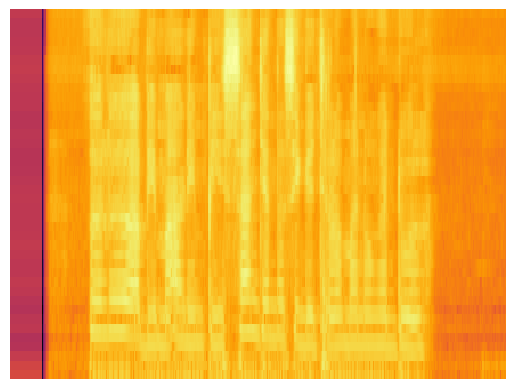

In [ ]:
mel_spectrogram('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/Selatan/KalimatSelatan3 (1).wav','/content/coba.png')

In [ ]:
# Visualisasi dan load gambar
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
#pembagian data training dan testing
images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/training/Banten', 0)
show_images(images)


x_train += images
y_train += labels

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/training/Selatan', 1)
show_images(images)

x_train += images
y_train += labels

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/testing/Banten', 0)
show_images(images)

x_test += images
y_test += labels


In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/testing/Selatan', 1)
show_images(images)

x_test += images
y_test += labels

In [ ]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import to_categorical

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
# Model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# Model 2
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# Training model
hist = model.fit(x_train_norm, y_train_encoded, epochs=20)

In [ ]:
# Confusion Matrix data test
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['Banten', 'Selatan']
print(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

# import library
import numpy
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import librosa
from keras.layers.regularization.dropout import Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

# fungsi mel_spectrogram
def mel_spectrogram(input_file, output_file,frame_size = 0.025,frame_stride = 0.01, NFFT = 512, nfilt = 40,pre_emphasis=0.97):

  signal, sample_rate = librosa.load(input_file)

  emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

  frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
  signal_length = len(emphasized_signal)
  frame_length = int(round(frame_length))
  frame_step = int(round(frame_step))
  num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))

  pad_signal_length = num_frames * frame_step + frame_length
  z = numpy.zeros((pad_signal_length - signal_length))
  pad_signal = numpy.append(emphasized_signal, z)

  indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
  frames = pad_signal[indices.astype(numpy.int32, copy=False)]

  hamming_window = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(frame_length) / (frame_length - 1))
  frames = frames * hamming_window

  mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))
  pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
  low_freq_mel = 0
  high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))
  mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)
  hz_points = (700 * (10**(mel_points / 2595) - 1))
  bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

  fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
  for m in range(1, nfilt + 1):
      f_m_minus = int(bin[m - 1])
      f_m = int(bin[m])
      f_m_plus = int(bin[m + 1])

      for k in range(f_m_minus, f_m):
          fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
      for k in range(f_m, f_m_plus):
          fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

  mel_spectrogram = numpy.dot(pow_frames, fbank.T)
  mel_spectrogram = numpy.where(mel_spectrogram == 0, numpy.finfo(float).eps, mel_spectrogram)
  mel_spectrogram = 20 * numpy.log10(mel_spectrogram)
  mel_spectrogram -= (numpy.mean(mel_spectrogram,axis=0) + 1e-8)
  # code for saving the plot
  fig, ax = plt.subplots()
  im = ax.imshow(mel_spectrogram.T, cmap='inferno', interpolation='nearest', aspect='auto', origin='lower')
  ax.axis('off')
  Jumlah_nilai = 0
  hasil_rata_frame = []
  for i in range(5,num_frames-5):
    Rata_frame=np.mean(mel_spectrogram[i],axis=0)
    Jumlah_nilai = Jumlah_nilai + Rata_frame
    hasil_rata_frame.append(Rata_frame)
  Mean = Jumlah_nilai/(num_frames-10)
  print(Mean)
  return plt.savefig(output_file)

mel_spectrogram('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/Banten/KalimatBanten1 (1).wav','/content/coba.png')

# Visualisasi dan load gambar
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train = []
y_train = []
x_test = []
y_test = []

#pembagian data training dan testing
images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/training/Banten', 0)
show_images(images)


x_train += images
y_train += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/training/Selatan', 1)
show_images(images)

x_train += images
y_train += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/testing/Banten', 0)
show_images(images)

x_test += images
y_test += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/2550/testing/Selatan', 1)
show_images(images)

x_test += images
y_test += labels

from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import to_categorical

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Model 2
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Training model
hist = model.fit(x_train_norm, y_train_encoded, epochs=20)

# Confusion Matrix data test
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['Banten', 'Selatan']
print(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import csv

def mel_spectrogram(input_file, output_file, frame_size=0.025, frame_stride=0.01, NFFT=512, nfilt=40, pre_emphasis=0.97):

    signal, sample_rate = librosa.load(input_file)

    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
    emphasized_signal_ = emphasized_signal[20000]
    print(emphasized_signal_)

    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z)

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(
        np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    hamming_window = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(frame_length) / (frame_length - 1))
    frames = frames * hamming_window
    frame_ = frames[100, 250]
    print(frame_)

    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
    pow_frame_ = pow_frames[100, 250]
    print(pow_frame_)

    return emphasized_signal_, frame_, pow_frame_


In [ ]:
import csv
import os
# Define function to extract mel spectrograms from all WAV files in a folder
def extract_mel_spectrogram(input_folder, output_folder):


    # Loop through all files in the input folder
    for root, dirs, files in os.walk(input_folder):
        for filename in files:
            # Check if file is a WAV file
            if filename.endswith('.wav'):
                # Get file path
                filepath = os.path.join(root, filename)

                # Set output file path
                output_file = os.path.join(output_folder, filename.replace('.wav', '.png'))

                # Extract mel spectrogram
                emphasized_signal_0, frame_0_0, pow_frame_0_0 = mel_spectrogram(filepath, output_file)

                # Write mel spectrogram to CSV file
                with open(os.path.join(output_folder, 'output1.csv'), 'a', newline='') as csvfile:
                    writer = csv.writer(csvfile)
                    # writer.writerow(['Nama Suara','Emphasized Signal[0]', 'Frames[0,0]', 'Pow Frames[0,0]'])
                    writer.writerow([filename, emphasized_signal_0, frame_0_0, pow_frame_0_0])

In [ ]:
extract_mel_spectrogram("/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/Banten","/content/")

-0.0008373689
0.006171246811706796
4.899512287626056e-10
0.00082504004
-0.0006584854354229581
3.3340283089139244e-12
-0.0014914088
0.004015292590650855
2.9203530401776516e-09
0.04014963
0.016739551075760136
1.9819056601897357e-09
-0.0183011
0.04536480867979927
6.32318784427437e-09
-0.0029011732
-0.0036605323147490165
3.84914283512978e-10
-0.000120505225
0.0003004026536233966
9.573195098843449e-11
0.012539215
-0.06047270934944458
3.238762071978382e-10
-0.0031997412
0.035920700939862486
4.296779407737587e-09
0.005155675
0.00046406905765578835
8.499480122225487e-14
-0.0045146197
0.004479254342630815
4.312686249998281e-11
0.012270436
0.00042839738928352096
7.135350100688086e-10
0.00794749
-0.008951226180071322
3.94375592565281e-10
-0.000681526
-0.0024195154687628746
3.3459649801381644e-10
0.058615178
-0.00904853463421309
7.777293588654959e-10
-0.0127297165
0.03461890926658191
1.6955508399674834e-10
0.00081371237
0.023076811221147575
2.7481377995319155e-08
-0.006927889
-0.023207238256875182

In [ ]:
extract_mel_spectrogram("/content/drive/MyDrive/Dataset_AI/Data_Skripsi/Kalimat/Selatan","/content/")

-0.0044704736
0.002221341850018987
1.0480526884484754e-12
6.4679974e-05
-0.004974273676045492
7.723680396377826e-12
0.0033863261
-0.001002653267310857
1.3555519344613638e-10
0.00055279024
0.0026985227929904134
2.9275678876141284e-13
-0.002391075
7.76410974335892e-06
1.2901726904629398e-12
0.0016622171
-0.00046683595607097643
4.742575997894133e-11
-2.2044289e-05
0.004964871676686469
6.3774151826586065e-12
0.0016622171
-0.00046683595607097643
4.742575997894133e-11
-0.002233982
0.0016122103992015928
2.984256823613102e-14
0.0030459617
-0.0008348211352706862
1.591234908653769e-11
0.0018984303
-0.001020848562658326
1.3928943646837073e-09
0.0075430274
-0.00399969342431858
5.644938255237954e-10
-0.014594018
-0.06390958384712876
2.411550600955295e-08
0.11924258
0.0003445882576393474
2.96107816556982e-11
-0.027062394
-0.03401109427389874
8.786545930922029e-10
0.0042859167
0.0076498000944007
6.0908558314474565e-09
-0.022474386
-0.04836193246497277
6.646806408527183e-09
0.0021849782
-0.07350745773

In [ ]:
import pandas as pd
df = pd.read_csv("/content/output1.csv",names=['Suara', 'Nilai pre emphasized', 'Windowing', 'FFT'])

In [ ]:
df

,Suara,Nilai pre emphasized,Windowing,FFT
0,KalimatBanten1 (4).wav,-0.000837,0.006171,4.899512e-10
1,KalimatBanten1 (9).wav,0.000825,-0.000658,3.334028e-12
2,KalimatBanten1 (3).wav,-0.001491,0.004015,2.920353e-09
3,KalimatBanten1 (10).wav,0.040150,0.016740,1.981906e-09
4,KalimatBanten1 (8).wav,-0.018301,0.045365,6.323188e-09
...,...,...,...,...
95,KalimatSelatan5 (8).wav,0.000627,-0.000381,1.624866e-11
96,KalimatSelatan5 (2).wav,-0.003696,0.000697,1.404643e-12
97,KalimatSelatan5 (1).wav,-0.009390,0.002065,1.031734e-09
98,KalimatSelatan5 (9).wav,0.000345,0.000131,1.163870e-09


In [ ]:
df.to_excel("output3.xlsx")